In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A graph of 2 nodes:
0:[1]
1:[0]

Nodes: [0, 1]
Edges: [(0, 1)]


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


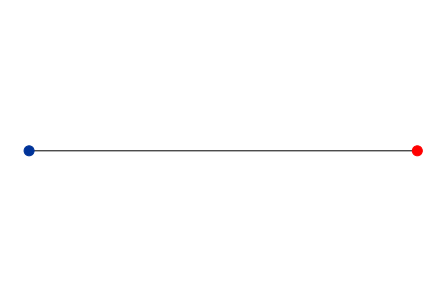

In [3]:
class Graph():
    def __init__(self):
        self.gdict = {}
        self.values = {}
        
    def add_node(self, node, val=0):
        if node not in self.gdict:
            self.gdict[node] = []
        self.values[node] = val
    
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def get_nodes(self):
        return list(self.gdict.keys())
    
    def get_edges(self):
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.values[nodes[i]]==0:
                colors.append(BLUE)
            else:
                colors.append(RED)
        nx.draw_kamada_kawai(g_nx, node_size=100, node_color=colors)
    
# Test
g = Graph()
g.add_edge(0,1)
print(g)
print('Nodes:',g.get_nodes())
print('Edges:',g.get_edges())
g.values[0] = 1
g.plot()

In [5]:
def degrees(g):
    degrees = []

    for node,links in g.gdict.items():
        degrees.append(len(links))
    print(degrees)

    hist = np.zeros(max(degrees)+1)

    for degree in degrees:
        hist[degree] += 1
    # print(hist)

    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    
    return hist

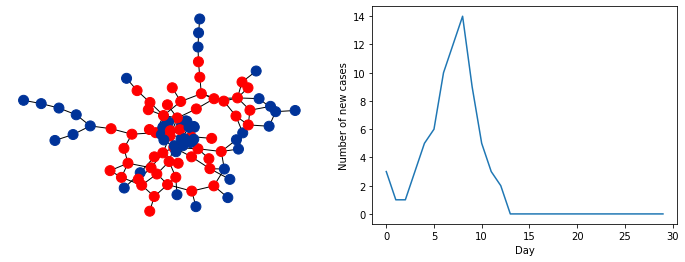

In [8]:
def random_network(n_nodes=7):
    
    N_EDGES = n_nodes

    g = Graph()

    for i in range(n_nodes):
        g.add_node(i)

    edges = []

    while len(edges) < N_EDGES:
        n1 = np.random.randint(low = 0, high = n_nodes)
        n2 = np.random.randint(low = 0, high = n_nodes)

        if n2 < n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g

# print(g)
g = random_network(100)
p = pandemic(g, prob=0.5, nsteps=10, n_nodes=7)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('Number of new cases');

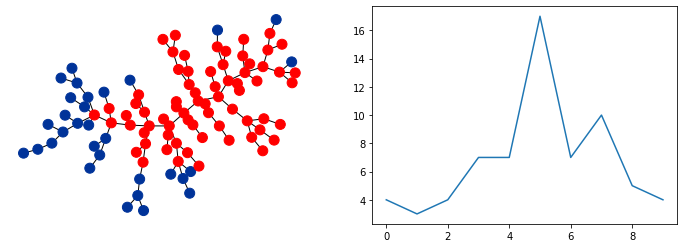

In [9]:
def rich_club_network(n_nodes=7):
    g = Graph()
    for i in range(n_nodes):
        if i==0:
            g.add_node(0)
        else:
            g.add_edge(i, np.random.randint(low=0, high=i))
    return g

g = rich_club_network(100)
p = pandemic(g, prob=0.5, nsteps=10, ntrials=10, n_nodes=7)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(p);

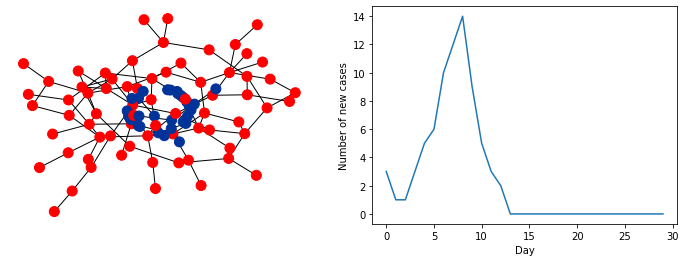

In [7]:
def pandemic(g, prob=0.5, nsteps=10, ntrials=10, n_nodes=7):
    for node in g.get_nodes():
        g.values[node] = 0     
        patientzero = np.random.randint(low=0, high=n_nodes)
    g.values[patientzero] = 1             

    history = np.zeros(nsteps)

    for t in range(nsteps):
        new_cases = []
        for node in g.get_nodes():
            if g.values[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.values[neighbor]==0 and np.random.uniform()<prob:
                        new_cases.append(neighbor)
        for node in new_cases:
            g.values[node] = 1
        history[t] = len(new_cases)
    return history

history = pandemic(g, prob=0.5, nsteps=30, ntrials=30, n_nodes=7)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('Number of new cases');

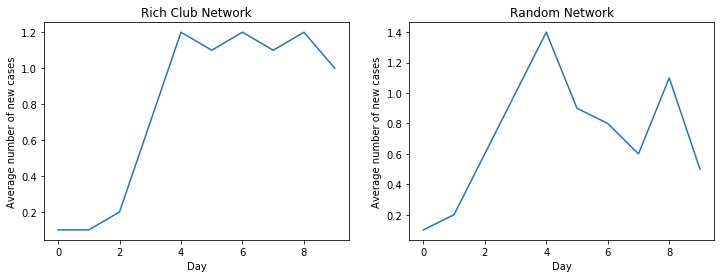

In [21]:
nsteps = 10             
ntrials = 10

richaverage = np.zeros(shape=(nsteps,ntrials))
randomaverage = np.zeros(shape=(nsteps,ntrials))

for itrial in range(ntrials):
    richhistory = pandemic(rich_club_network(100), prob=0.5, nsteps=10)
    richaverage[:,ntrials-1] = richhistory
    randomhistory = pandemic(random_network(100), prob=0.5, nsteps=10)
    randomaverage[:,ntrials-1] = randomhistory

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(np.mean(richaverage,axis=1))
plt.title("Rich Club Network")
plt.xlabel('Day');
plt.ylabel('Average number of new cases');
plt.subplot(122)
plt.plot(np.mean(randomaverage,axis=1));
plt.title("Random Network")
plt.xlabel('Day');
plt.ylabel('Average number of new cases');